# TP GEOLOC SIGFOX - MAIN

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from geopy.distance import vincenty

In [2]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor

/Users/christopherbelinguier/virtualenvs/idemia_env/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from tools import * #tools.py file from Christopher

## PATH

In [4]:
path_data = 'data/'

# Feature matrix

In [5]:
df_train = pd.read_csv(path_data + 'train_formatted_lat_lng_dummies.csv',delimiter=";") # train set
df_val = pd.read_csv(path_data + 'val_formatted_lat_lng_dummies.csv',delimiter=";") # val set
df_test = pd.read_csv(path_data + 'test_formatted_lat_lng_dummies.csv',delimiter=";") # test set

In [6]:
groups = df_train['did']

df_train = df_train.drop('did',axis=1)
df_val = df_val.drop('did',axis=1)
df_test = df_test.drop('did',axis=1)

print("df_train",df_train.shape)
print("df_val",df_val.shape)
print("df_test",df_test.shape)

df_train (5046, 518)
df_val (1022, 518)
df_test (5294, 518)


Lat / Lng : y

In [7]:
ground_truth_train = pd.read_csv(path_data + 'ground_truth_train.csv',delimiter=";") # train set
ground_truth_val = pd.read_csv(path_data + 'ground_truth_val.csv',delimiter=";") # val set

In [8]:
print("ground_truth_train",ground_truth_train.shape)
print("ground_truth_val",ground_truth_val.shape)

ground_truth_lat = ground_truth_train['lat']
ground_truth_lng = ground_truth_train['lng']

ground_truth_train (5046, 2)
ground_truth_val (1022, 2)


## Find best model

##### latitude

In [9]:
from sklearn.model_selection import LeaveOneGroupOut


def best_param(X_train, y_train,groups):

    #n_estimators_range = np.linspace(20, 1000, num=6, dtype=np.int64)
    n_estimators_range = [1000]
    
    # "max_depth":[None]
    my_param_grid = {"n_estimators": n_estimators_range,
                     "learning_rate":[0.1], "min_child_weight":[3, 9, 27]}
    
    # my_param_grid = {"n_estimators": n_estimators_range, "min_samples_leaf":[5]}
    
    X_train = np.array(X_train); 
    
    # reg = RandomForestRegressor()
    reg = XGBRegressor()
    
    cv_loo = LeaveOneGroupOut().split(X_train, y_train, groups)
    paramGrid = GridSearchCV(estimator=reg, 
                         param_grid=my_param_grid,
                         cv=cv_loo, n_jobs=-1, verbose=2)

    paramGrid.fit(X_train, y_train);

    return paramGrid

##### latitude

In [10]:
# paramGrid = best_param(df_train, ground_truth_lat, groups)
# best_model_lat = paramGrid.best_estimator_
# best_model_lat

In [11]:
# paramGrid.cv_results_

##### longitude

In [12]:
# paramGrid = best_param(df_train, ground_truth_lng, groups)
# best_model_lng = paramGrid.best_estimator_
# best_model_lng

In [13]:
# paramGrid.cv_results_

## Regression and prediction

In [14]:
def reg_predict(X_train, y_train, X_val, best_model):
    
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_val)
    
    return y_pred

##### latitude

In [15]:
# y_pred_lat = reg_predict(df_train, ground_truth_lat, df_val, best_model_lat)
# y_pred_lat

##### longitude 

In [16]:
# y_pred_lng = reg_predict(df_train, ground_truth_lng, df_val, best_model_lng)
# y_pred_lng

# Random Forest Regressor

In [17]:
clf_RandomForestRegressor_lat = RandomForestRegressor(n_estimators=64, max_depth=None).fit(df_train, ground_truth_lat)
y_pred_lat = clf_RandomForestRegressor_lat.predict(df_val)

In [18]:
clf_RandomForestRegressor_lng = RandomForestRegressor(n_estimators=118, max_depth=None).fit(df_train, ground_truth_lng)
y_pred_lng = clf_RandomForestRegressor_lng.predict(df_val)

## XGBRegressor

In [19]:
# clf = XGBRegressor(min_child_weight=3, max_depth=200, learning_rate=0.1, n_estimators=1000).fit(df_train, ground_truth_lat)
# y_pred_lat = clf.predict(df_val)

In [20]:
# clf = XGBRegressor(min_child_weight=3, max_depth=200, learning_rate=0.1, n_estimators=1000).fit(df_train, ground_truth_lng)
# y_pred_lng = clf.predict(df_val)

## Compute error

Error criterion :  3864.07333437


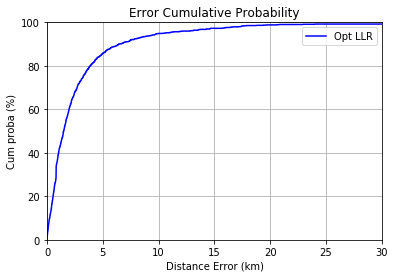

In [21]:
error = compute_and_plot_error_distribution(ground_truth_val['lat'] , ground_truth_val['lng'], y_pred_lat, y_pred_lng)

## TEST PREDICTION

In [22]:
# Feature matrix (test)
print("df_test.shape : ", df_test.shape)
df_test.head()

df_test.shape :  (5294, 518)


,879_lat,911_lat,921_lat,944_lat,980_lat,1012_lat,1086_lat,1092_lat,1120_lat,1131_lat,...,9936_lng,9941_lng,9949_lng,10134_lng,10148_lng,10151_lng,10162_lng,10999_lng,11007_lng,11951_lng
0,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,...,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958
1,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,...,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958
2,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,...,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958
3,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,...,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958
4,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,-6581.315727,...,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958,15667.468958


In [23]:
# Predict y_pred_lat
y_pred_lat = reg_predict(df_train, ground_truth_lat, df_test, clf_RandomForestRegressor_lat)
y_pred_lat

array([ 39.72191943,  39.78310248,  39.68940683, ...,  39.66540856,
        39.6741952 ,  39.67446386])

In [24]:
# Predict y_pred_lng
y_pred_lng = reg_predict(df_train, ground_truth_lng, df_test, clf_RandomForestRegressor_lng)
y_pred_lng

array([-105.05976641, -105.06961913, -105.00508567, ..., -105.01760537,
       -105.02003542, -105.00286842])

In [25]:
# Transform prediction in data frame
test_res = pd.DataFrame(np.array([y_pred_lat, y_pred_lng]).T, columns = ['lat', 'lng'])

In [26]:
# Create csv
test_res.to_csv('pred_pos_test_list.csv', index=False)

In [27]:
# Print prediction
print("test_res.shape : ", test_res.shape)
test_res.head()

test_res.shape :  (5294, 2)


,lat,lng
0,39.721919,-105.059766
1,39.783102,-105.069619
2,39.689407,-105.005086
3,39.794350,-105.074303
4,39.688519,-105.000153
